In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re
import pickle

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score

In [ ]:
import joblib

In [ ]:
df = pd.read_csv('/content/crimedata.csv', encoding='latin-1')

In [ ]:
df = df.filter(df.columns[[0,1,5,6,11,12,13,14,17,20,22,24,33,34,35,36,37,46,48,49,50,51,72,74,89,121,130,132,134,136,138,140,142,144,145,146]], axis=1)

In [ ]:
df = df.filter(df.columns[[9,10,12,16,17,18,19,20,21,22,36]], axis=1)

In [ ]:
df=df.dropna()

In [ ]:

df.ViolentCrimesPerPop = pd.to_numeric(df.ViolentCrimesPerPop, errors='coerce')



In [ ]:
df=df.dropna()

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df

,Êcommunityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,medIncome,pctWInvInc,pctWPubAsst,medFamInc,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,TotalPctDiv,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,PctHousLess3BR,RentMedian,PopDens,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,75122,70.20,1.03,79584,1.96,5.81,9.90,48.18,2.70,4.47,91.43,90.17,95.78,95.81,91.46,11.06,1001,1845.9,0.00,0,8.2,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,47917,64.11,2.75,55323,3.98,5.61,13.72,29.89,2.43,5.42,86.91,85.33,96.82,86.46,89.03,23.60,560,2186.7,0.00,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,35669,55.73,2.94,42112,4.75,2.80,9.09,30.13,4.01,12.55,78.54,78.85,92.37,75.72,64.18,47.46,428,2780.9,8.30,16.6,154.95,38.74,758.14,4972.19,376.3,60.87,218.59,6167.51
3,Gloversvillecity,NY,16656,2.40,12.55,25.20,12.19,17.57,20580,38.95,11.71,26501,17.23,11.05,33.68,10.81,9.86,12.91,64.02,62.36,65.38,67.43,58.18,45.66,250,3217.7,0.00,57.86,57.86,190.93,1301.78,4142.56,271.93,?,306.64,?
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,21577,41.15,7.12,27705,17.78,8.76,23.03,20.66,5.72,13.04,71.94,69.79,79.76,75.33,57.81,53.19,280,1995.7,4.63,50.98,90.05,297.29,1386.46,5091.64,300.6,88.72,442.95,6867.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,56216,3.07,15.46,30.16,14.34,8.08,24727,31.42,19.98,27388,25.06,17.12,30.87,15.79,9.99,13.34,67.04,64.81,76.19,72.78,41.69,57.23,374,3365.4,16.49,49.46,199.5,280.29,2268.72,4225.82,806.25,56.06,545.75,7356.84
2211,Pinevillecity,LA,12251,2.68,17.36,31.23,16.97,12.57,20321,33.25,8.85,25000,20.79,12.51,27.71,19.28,7.90,13.77,68.57,63.66,80.29,73.68,56.06,54.48,248,1682.8,0.00,33.09,8.27,82.73,860.43,4748.9,198.56,16.55,124.10,5824.44
2212,Yucaipacity,CA,32824,2.46,11.81,20.96,9.53,20.73,27182,44.72,9.01,34973,7.56,7.82,26.14,12.42,5.18,11.23,76.77,74.20,76.92,82.42,74.61,61.03,451,1195.2,13.61,13.61,65.32,261.29,1709.26,2435.97,487.19,21.77,353.83,4654.2
2213,Beevillecity,TX,13547,2.89,17.16,30.01,14.73,10.42,19899,21.94,13.05,22103,30.32,24.37,39.63,12.40,12.12,12.48,67.76,63.45,87.82,74.12,60.11,50.28,227,2142.2,0.00,15.71,54.98,620.48,1508.01,3722.9,102.1,7.85,691.17,5340.87


In [ ]:
crimerate = df["ViolentCrimesPerPop"]

cond_list = [ crimerate < 200, crimerate < 600,crimerate >= 600]
choice_list = ["low", "moderate","high",]

df["crimerate"] = np.select(cond_list, choice_list)

In [ ]:
features = ['pctWInvInc','pctWPubAsst','PctPopUnderPov','PctUnemployed','TotalPctDiv','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctPersOwnOccup']
X = df.loc[:, features]
y = df.loc[:, ['crimerate']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)



<ipython-input-46-ddd92cc7f90b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
value_counts = y_test.value_counts()

In [ ]:
value_counts

crimerate
moderate     146
high         134
low          119
dtype: int64

In [ ]:
predictions = rf_classifier.predict(X_test)

In [ ]:
predictions

In [ ]:
value_to_count = 'moderate'

In [ ]:
count = sum(1 for item in predictions if item == value_to_count)

In [ ]:
count

164

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
precision = precision_score(y_test, predictions,average='macro')
print("Precision:",precision )
recall = recall_score(y_test, predictions,average='macro')
print("Recall:", recall)
f1 = f1_score(y_test, predictions,average='macro')
print("F1:", f1)

Accuracy: 0.6716791979949874
Precision: 0.6845596432552954
Recall: 0.6734592835294003
F1: 0.6779209970531413


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        high       0.76      0.72      0.74       134
         low       0.73      0.69      0.71       119
    moderate       0.57      0.62      0.60       146

    accuracy                           0.68       399
   macro avg       0.69      0.68      0.68       399
weighted avg       0.68      0.68      0.68       399



In [ ]:
y_test

,crimerate
1190,moderate
12,high
1041,high
1726,low
1460,low
...,...
2085,moderate
407,low
1590,low
638,moderate


KeyError: ignored

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
cm

array([[98,  4, 32],
       [ 1, 79, 39],
       [29, 24, 93]])

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]

SyntaxError: ignored

In [ ]:
conf_matrix

array([[98,  3, 33],
       [ 2, 81, 36],
       [30, 24, 92]])

In [ ]:
cm

array([[98,  4, 32],
       [ 1, 79, 39],
       [29, 24, 93]])

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['High','Low','Moderate'],
                     columns = ['High','Low','Moderate'])

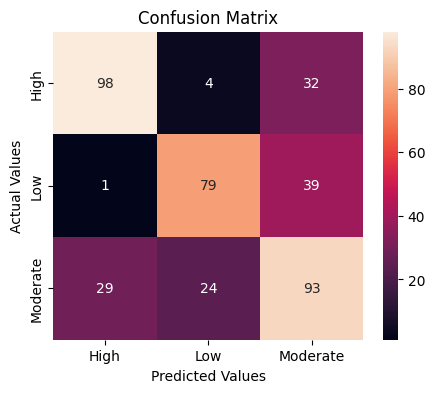

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
report

'              precision    recall  f1-score   support\n\n        high       0.75      0.73      0.74       134\n         low       0.73      0.67      0.70       119\n    moderate       0.55      0.60      0.57       146\n\n    accuracy                           0.66       399\n   macro avg       0.68      0.67      0.67       399\nweighted avg       0.67      0.66      0.67       399\n'

In [ ]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20],
}

In [ ]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy');
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: Data

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_params

{'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
input_data = (65.12,2.03,1.34,1.23,1.78,81.81,90.58,91.34,97.76,90.43)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 'low'):
  print('low')
elif (prediction[0]=='high'):
  print('high')
else:
  print('moderate')

['moderate']
moderate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (65.12,2.03,1.34,1.23,1.78,81.81,90.58,91.34,97.76,90.43)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 'low'):
  print('low')
elif (prediction[0]=='high'):
  print('high')
else:
  print('moderate')

['moderate']
moderate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
newdf = (df['agePct12t29'] >= 17.106250000000003) & (df['agePct12t29'] <= 36.45625)&(df['agePct65up'] >= 0.3474999999999966)&(df['agePct65up'] <= 23.0075)&(df['medIncome'] <= 68157.75)&(df['pctWInvInc'] >= 6.763750000000005)&(df['pctWInvInc'] <= 79.93374999999999)&(df['pctWPubAsst'] <= 17.70375)&(df['PctPopUnderPov'] <= 35.655)&(df['PctLess9thGrade'] <= 23.28875)&(df['PctNotHSGrad'] <= 52.821250000000006)&(df['PctBSorMore'] <= 51.37)&(df['PctUnemployed'] <= 12.39)&(df['TotalPctDiv'] >= 1.8612499999999983)&(df['TotalPctDiv'] <= 19.81125)&(df['PctFam2Par'] >= 46.86125)&(df['PctFam2Par'] <= 102.73125)&(df['PctKids2Par'] >= 39.31000000000001)&(df['PctKids2Par'] <= 104.38999999999999)&(df['PctYoungKids2Par'] >= 49.691250000000004)&(df['PctYoungKids2Par'] <= 116.64124999999999)&(df['PctTeen2Par'] >= 50.78499999999999)&(df['PctTeen2Par'] <= 101.82500000000002)&(df['PctPersOwnOccup'] >= 28.11125)&(df['PctPersOwnOccup'] <= 103.98125)&(df['PctHousLess3BR'] >= 12.857499999999995)&(df['PctHousLess3BR'] <= 79.0375)&(df['PctHousLess3BR'] <= 945.0)&(df['PctHousLess3BR'] <= 1735.3587499999999)

In [ ]:
filtered_df = df[newdf]

In [ ]:
filtered_df

,Êcommunityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,medIncome,pctWInvInc,...,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,47917,64.11,...,0.00,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,35669,55.73,...,8.30,16.6,154.95,38.74,758.14,4972.19,376.3,60.87,218.59,6167.51
3,Gloversvillecity,NY,16656,2.40,12.55,25.20,12.19,17.57,20580,38.95,...,0.00,57.86,57.86,190.93,1301.78,4142.56,271.93,?,306.64,?
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,21577,41.15,...,4.63,50.98,90.05,297.29,1386.46,5091.64,300.6,88.72,442.95,6867.42
6,Norwoodtown,MA,28700,2.60,11.17,27.41,12.76,14.42,42805,47.70,...,0.00,13.53,30.44,182.66,372.09,974.19,487.1,57.5,226.63,1890.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,WestHaventown,CT,54021,2.54,11.86,27.72,13.18,13.39,35723,40.72,...,0.00,9.46,124.89,151.38,985.85,3256.51,883.67,18.92,285.73,5144.94
2208,Willistoncity,ND,13131,2.56,13.81,24.03,10.78,12.99,22407,46.16,...,0.00,7.81,15.62,23.42,242.04,3372.89,203,0,46.85,3817.93
2209,Manvilleborough,NJ,10567,2.57,10.42,24.90,11.10,15.33,37664,48.61,...,0.00,0,28.47,104.39,170.83,1717.76,104.39,0,132.87,1992.98
2211,Pinevillecity,LA,12251,2.68,17.36,31.23,16.97,12.57,20321,33.25,...,0.00,33.09,8.27,82.73,860.43,4748.9,198.56,16.55,124.10,5824.44


In [ ]:
filtered_df=filtered_df.dropna()

In [ ]:
filtered_df.ViolentCrimesPerPop = pd.to_numeric(filtered_df.ViolentCrimesPerPop, errors='coerce')

In [ ]:
crimerate = filtered_df["ViolentCrimesPerPop"]

cond_list = [ crimerate < 200, crimerate < 600,crimerate >= 600]
choice_list = ["low", "moderate","high",]

filtered_df["crimerate"] = np.select(cond_list, choice_list)

In [ ]:
filtered_df

,pctWInvInc,pctWPubAsst,PctPopUnderPov,PctUnemployed,TotalPctDiv,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctPersOwnOccup,crimerate
1,64.11,2.75,3.98,2.43,5.42,86.91,85.33,96.82,86.46,89.03,low
2,55.73,2.94,4.75,4.01,12.55,78.54,78.85,92.37,75.72,64.18,moderate
3,38.95,11.71,17.23,9.86,12.91,64.02,62.36,65.38,67.43,58.18,moderate
5,41.15,7.12,17.78,5.72,13.04,71.94,69.79,79.76,75.33,57.81,moderate
6,47.70,5.41,4.01,4.85,7.64,79.53,79.76,92.05,77.12,64.62,moderate
...,...,...,...,...,...,...,...,...,...,...,...
2207,40.72,4.89,6.06,5.45,10.93,71.24,68.64,81.27,75.22,61.78,moderate
2208,46.16,7.36,14.46,5.88,9.20,77.17,77.16,82.32,81.83,68.26,low
2209,48.61,5.43,4.33,4.13,8.98,76.36,73.53,91.16,73.45,75.36,low
2211,33.25,8.85,20.79,7.90,13.77,68.57,63.66,80.29,73.68,56.06,low


In [ ]:
filtered_df=filtered_df.dropna()

In [ ]:
filtered_df = filtered_df.filter(filtered_df.columns[[9,10,12,16,17,18,19,20,21,22,36]], axis=1)

In [ ]:
features = ['pctWInvInc','pctWPubAsst','PctPopUnderPov','PctUnemployed','TotalPctDiv','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctPersOwnOccup']
X = filtered_df.loc[:, features]
y = filtered_df.loc[:, ['crimerate']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
rf_classifier = RandomForestClassifier(criterion= 'gini',
 max_depth = 20,
 max_leaf_nodes = 20,
 min_samples_leaf= 2,
 min_samples_split= 10,
 n_estimators= 100)
rf_classifier.fit(X_train, y_train)


<ipython-input-169-e54d865b6a81>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=2,
                       min_samples_split=10)

In [ ]:
predictions = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6107594936708861


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20],
}

In [ ]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy');
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: Data

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_params

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}